In [1]:
import pandas as pd
df=pd.read_csv('customer_churn.csv')

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

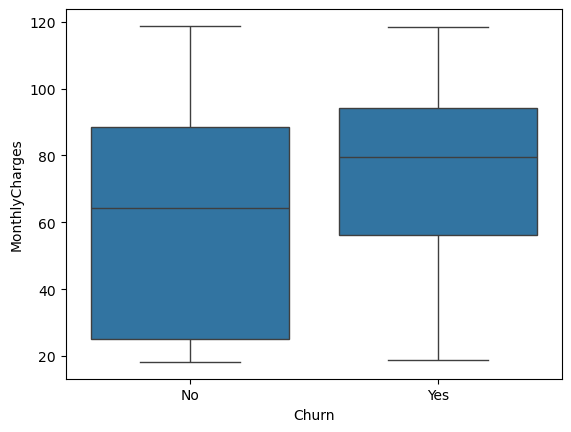

In [7]:
sns.boxplot(x='Churn',y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='count'>

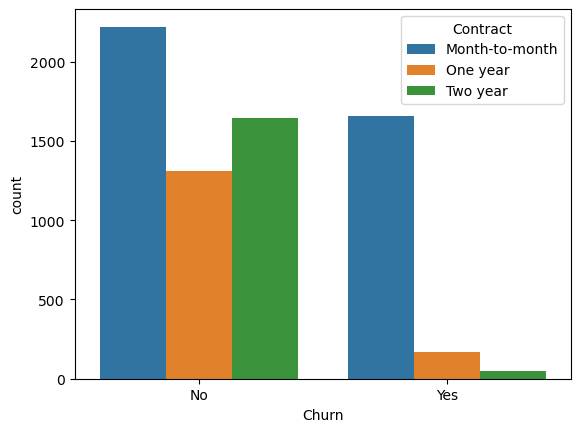

In [8]:
sns.countplot(x='Churn', hue='Contract', data=df)

<Axes: xlabel='Churn', ylabel='count'>

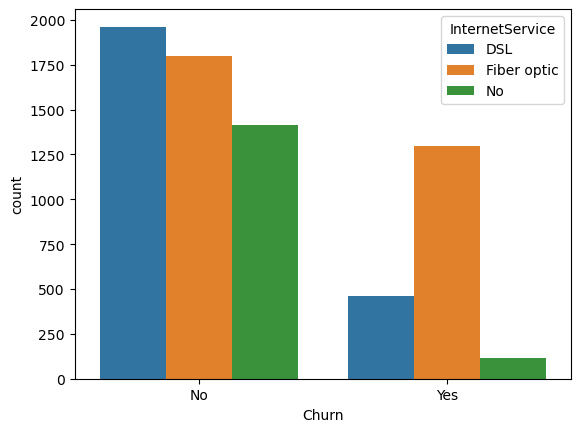

In [9]:
sns.countplot(x='Churn', hue='InternetService', data=df)

<Axes: xlabel='Churn', ylabel='count'>

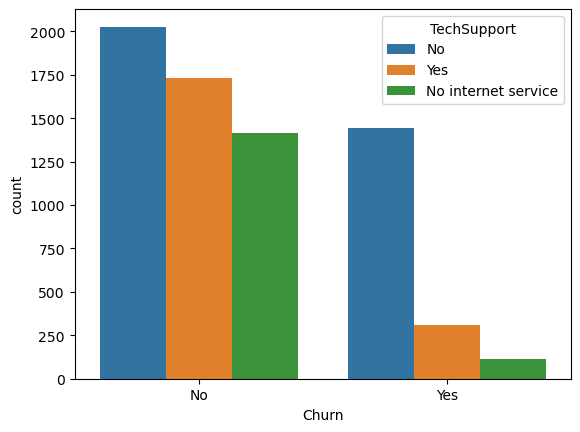

In [10]:
sns.countplot(x='Churn', hue='TechSupport', data=df)

<Axes: xlabel='Churn', ylabel='count'>

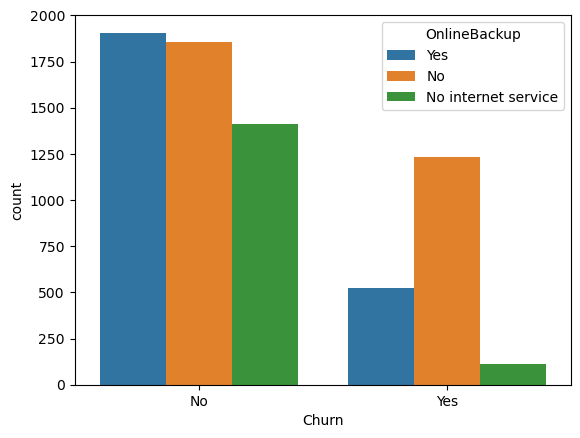

In [11]:
sns.countplot(x='Churn', hue='OnlineBackup', data=df)

Text(0.5, 1.0, 'Churn vs Online Backup')

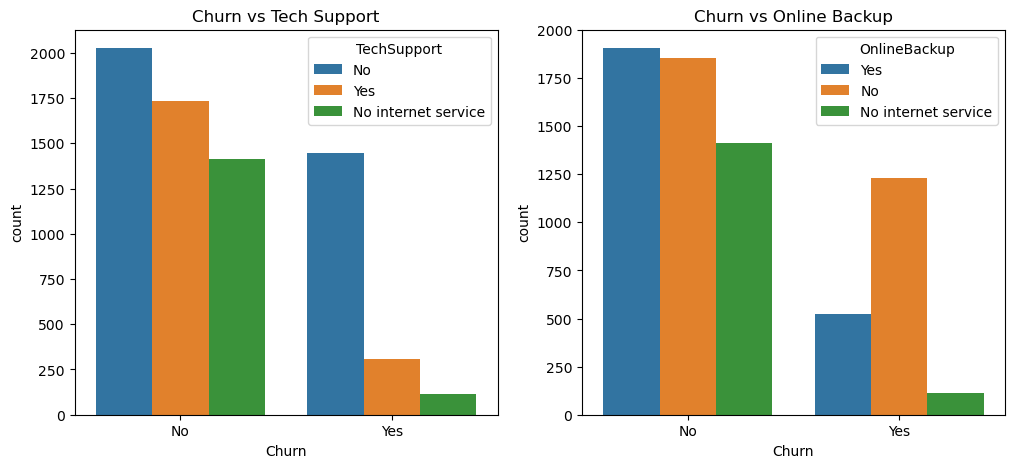

In [12]:
fig, axes=plt.subplots(1, 2, figsize=(12,5))

sns.countplot(x='Churn', hue='TechSupport', data=df, ax=axes[0])
axes[0].set_title('Churn vs Tech Support')
sns.countplot(x='Churn', hue='OnlineBackup', data=df, ax=axes[1])
axes[1].set_title('Churn vs Online Backup')

<Axes: xlabel='Churn', ylabel='tenure'>

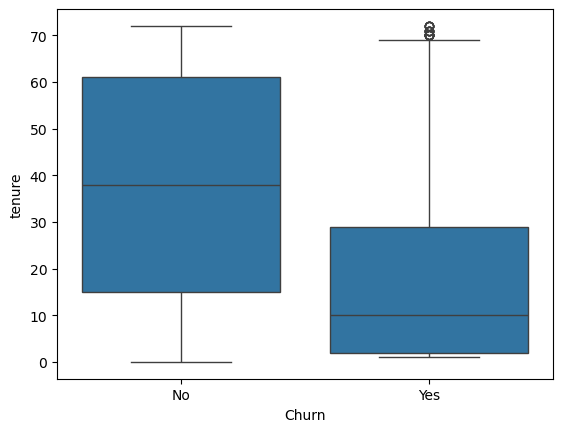

In [13]:
sns.boxplot(x='Churn', y='tenure', data=df)

<Axes: xlabel='Churn', ylabel='count'>

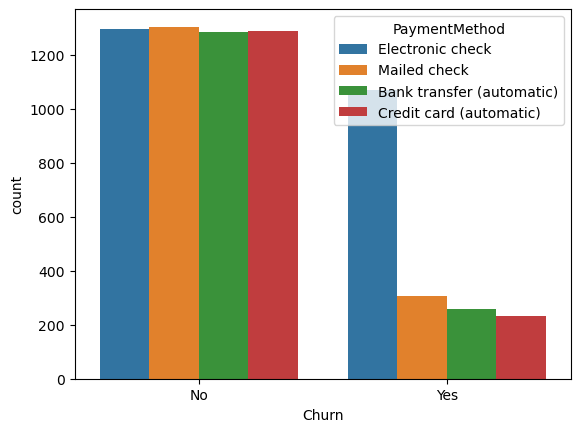

In [14]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df)

In [15]:
# Groupby
print(df.groupby('gender')['Churn'].value_counts(normalize=True).unstack())

# Pivot Table
churn_gender = df.pivot_table(index='gender', columns='Churn', aggfunc='size', fill_value=0)
print(churn_gender)


Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603
Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


In [16]:
df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()

Churn,No,Yes
SeniorCitizen,,
0,0.763938,0.236062
1,0.583187,0.416813


In [17]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [18]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [19]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df=df.dropna(subset=['TotalCharges'])

In [21]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['gender','Partner','Dependents','PhoneService','MultipleLines',
'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','Contract',
'PaperlessBilling','PaymentMethod']:

    df[col] = le.fit_transform(df[col])

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,No
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,No
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,Yes
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,No
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,Yes


In [25]:
df.dtypes

customerID           object
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [26]:
from sklearn.model_selection import train_test_split
X = df.drop(['customerID','Churn'], axis=1) 
y = df['Churn'].map({'No':0, 'Yes':1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = rf_model.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score;
accuracy_score(y_test, y_pred)

0.7838862559241706

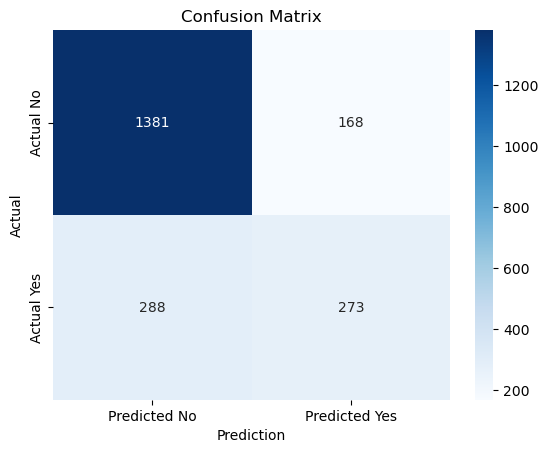

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
xticklabels=['Predicted No','Predicted Yes'],
yticklabels=['Actual No','Actual Yes'])
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()